# Лабораторная работа №5

# Анимация качения треугольника Рело по квадрату

Корзун В. А. Вариант 3 07.04.2024

## 1. Начальное положение треугольника Рёло и квадрата

Изобразим в одной графической области треугольник Рело (сплошная линия красного цвета), точку центра треугольника Рело (маркер черного цвета) и квадрат (сплошная линия синего цвета), в который вписан треугольник Рело:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import relo

In [2]:
%matplotlib widget

Определим исходные данные для построения треугольника Рело:

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

Для построения матрицы relo_matrix координат точек-границ треугольника Рело используем функцию regular_polygon_Relo(n, center, r, N) из модуля relo, созданного в Лабораторной работе 4:

In [4]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

Длина стороны квадрата равна ширине треугольника Рело , центр квадрата располагаем в начале координат.

$\color{red}{Построим}$ матрицу square для покоординатного описания границы квадрата.

$\color{red}{Изобразим}$ в одной системе координат квадрат, треугольник Рело и точку центра треугольника Рело:

In [5]:
square = np.array([[r/2,r/2], [-r/2, r/2],[-r/2,-r/2],[r/2,-r/2], [r/2,r/2]])

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

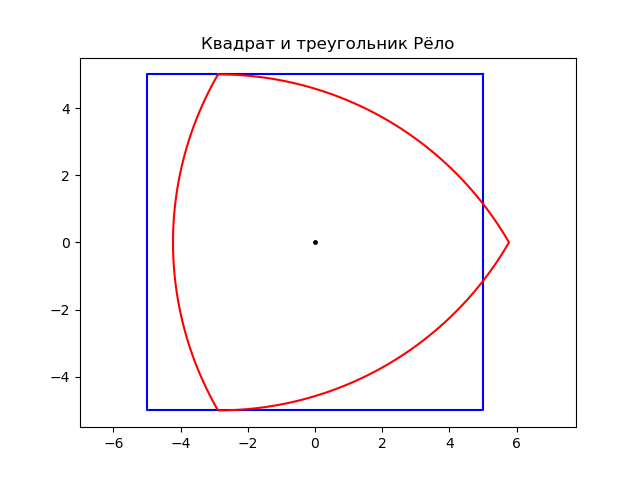

In [6]:
plt.title("Квадрат и треугольник Рёло")
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

Треугольник Рёло необходимо сдвинуть влево таким образом, чтобы он оказался вписанным в квадрат. $\color{Red}{Определим}$ величину вектора сдвига shift. $\color{Red}{Поясниим}$ в тексте документа формулу для расчёта вектора сдвига:

Посчитаем сдвиг как разность радиуса r округлой стороны и высоты треугольника, а также прибавим расстояние от округлой стороны, до стороны квадрата путём разности трети высоты от половины стороны квадрата:

$$h_3 = \frac{l \sqrt 3}2$$

In [7]:
h3 = r * 3**(1/2) / 2 # Высота равностороннего треугольника
shift = np.array([r / 2 - h3 / 3 - r + h3, 0]) # Находим смещение
relo_matrix_shifted = relo_matrix - shift # Сдвигаем все координаты
center -= shift # И координаты центра в том числе

Посмотрим, что получилось:

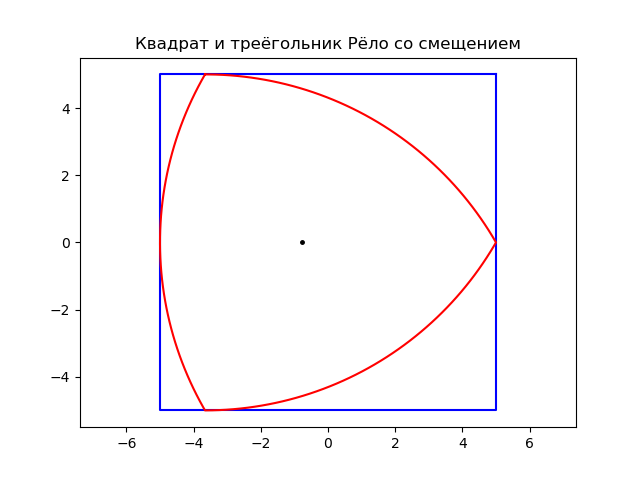

In [8]:
plt.figure()
plt.title("Квадрат и треёгольник Рёло со смещением")
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal');

## 2. Анимация поступательного движения треугольника Рёло по окружности

Полагаем, что при качении треугольника Рело по квадрату против часовой стрелки центр треугольника Рело совершает поступательное движение по окружности с центром окружности в начале координат и радиусом, равным shift[0] , против часовой стрелки.

Зададим количество кадров анимации N_frames , необходимое для поступательного движения треугольника с полным обходом окружности

In [9]:
N_frames = 100

Создадим матрицу center_frame из N_frames строк и двух столбцов для описания координат точек окружности, необходимой для реализации поступательного движения, с центром в начале координат и радиусом shift[0] при обходе окружности против часовой стрелки от -$\pi$ до $\pi$. В первом столбце матрицы расположены x-координаты точек, во втором столбце -- y-координаты.

In [10]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

Изобразим первый кадр анимации. Для этого в одной графической области изображаем квадрат (сплошная линия синего цвета), вписанный треугольник Рело (сплошная линия красного цвета), центр треугольника Рело (линия по точкам красного цвета) и окружность, по которой будет двигаться центр треугольника Рело (пунктирная линия черного цвета):

In [16]:
frame = 20
relo_matrix_shifted = relo_matrix + center_frame[frame]

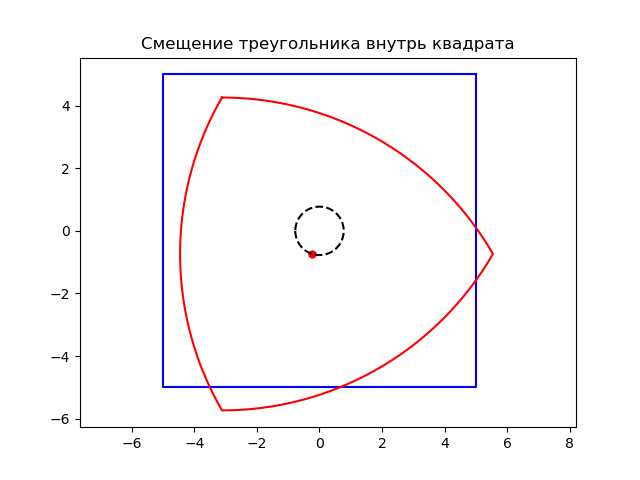

In [29]:
plt.figure()
plt.title("Смещение треугольника внутрь квадрата")
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal');

$\color{Red}{Напишем~пользовательскую~функцию}$ трёх фргументов draw_frame(r, N_frames, frame), которая изображает кадр с номером frame при поступательном движении центра треугольника Рёло по окружности против часовой стрелки:

- Аргумент r задает ширину треугольника Рело.
- Аргумент N_frames задает количество кадров для прохождения центром
треугольника Рело полной окружности.
- Аргумент frame задает номер кадра; по умолчанию frame=0.
- Функция осуществляет визуализацию и не возвращает объекты.

In [18]:
def draw_frame(r, N_frames, frame = 0):
    """Функция рисует i-ый кадр анимации поступательного движения центра треугольника Рёло по окружности против часовой стрелки

    Arguments:

    r: сторона квадрата или ширина треугольника Рёло

    N_frames: кол-во кадров анимации

    frame: номер кадра анимации

    Returns: none
    """
    n = 3
    center = np.array([0.,0.])
    N = 100                                                     # Изначальные значения
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    square = np.array([[r/2,r/2], [-r/2, r/2],[-r/2,-r/2],[r/2,-r/2], [r/2,r/2]])

    h3 = r * 3**(1/2) / 2
    shift = np.array([r / 2 - h3 / 3 - r + h3, 0])

    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    
    relo_matrix_shifted = relo_matrix + center_frame[frame]     # Само смещение

    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')         # Вывод результата
    plt.axis('equal');

Изобразим несколько кадров анимации, расположив их в одном графическом окне по горизонтали. Для этого используем функцию subplot(m,n,k) из модуля pyplot пакета matplotlib , которая позволяет расположить графики в виде таблицы из m строк, n столбцов на k -ой позиции при последовательной нумерации графиков слева-направо и сверху-вниз, начиная с 1:

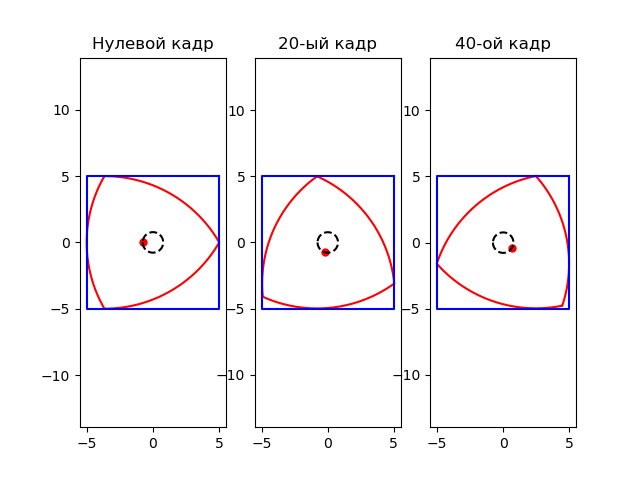

In [30]:
plt.figure()
N_frames = 100

plt.subplot(1,3,1)
plt.title("Нулевой кадр")
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
plt.title("20-ый кадр")
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
plt.title("40-ой кадр")
draw_frame(r=r, N_frames=N_frames, frame=40)

Реализуем анимацию движения треугольника внутри квадрата:

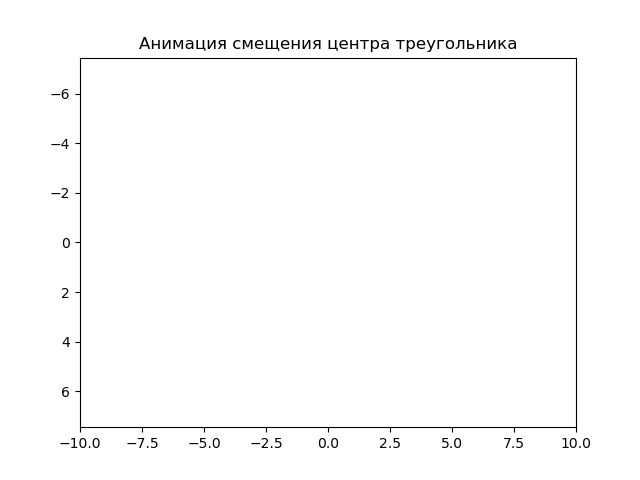

In [31]:
fig1 = plt.figure()
ax1 = plt.axes()

plt.axis("equal")
plt.axis([-r, r, r, -r])
plt.title("Анимация смещения центра треугольника")

def init():
    """создает начальное состояние графической области"""
    global center_point, relo_triag

    center_point, = ax1.plot([center_frame[0,0]], [center_frame[0,1]],'r.', markersize = 10)
    center_circle, = ax1.plot(center_frame[:,0], center_frame[:,1],'k--')
    relo_triag, = ax1.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
    square_plt, = ax1.plot(square[:,0],square[:,1],'b-')
    # plt.legend(['$y(x) = (x-5)^3$','Мovable point'])
    
def at_frame1(frame):
    center_point.set_data([center_frame[frame,0]], [center_frame[frame,1]])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    relo_triag.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])

FuncAnimation(fig1, at_frame1, frames=np.arange(N_frames), init_func=init, repeat=False, interval=30)

## 3. Анимация качения треугольника рёло

Дополнительно к поступательному движению треугольника Рело против часовой
стрелки добавим вращательное движение по часовой стрелке на угол $\theta$. При этом
будем учитывать, что полный оборот центра треугольника на угол $2\pi$ соответствует
вращению треугольника Рело на угол $\frac{2\pi}3$.

Определим пользовательскую функцию rotate_matrix(theta) для создания
**матрицы поворота по часовой стрелке** на угол theta с применением синтаксиса
lambda-функций

In [21]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
[-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

Для поворота треугольника Рело на заданный угол необходимо матрицу поворота
умножить на каждую точку в представлении треугольника Рело relo_matrix с
центром в начале координат. Для умножения матрицы на вектор используем
функцию dot из расширения numpy.

Например, повернем треугольник Рело relo_matrix с центром в начале координат
на угол $\frac \pi3$ по часовой стрелке:

In [22]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

Изобразим в одной графической области исходный треугольник Рело (сплошная линия
красного цвета) и повернутый треугольник Рело (пунктирная линия зеленого цвета).
При этом выделим маркером первую точку в матричном представлении треугольника
Рело, чтобы проиллюстрировать эффект вращения по часовой стрелке на угол $\frac \pi3$.

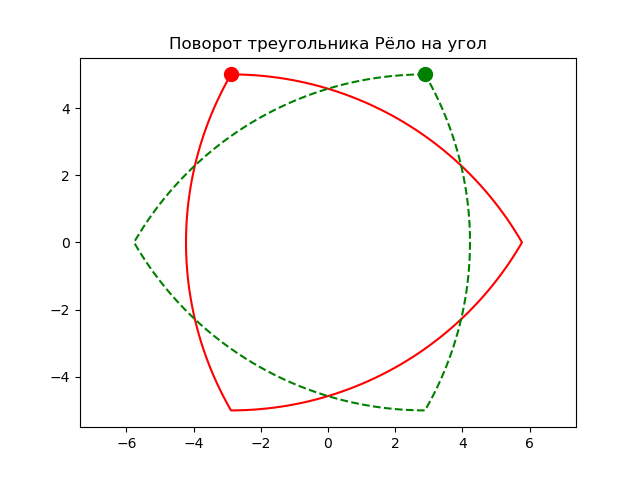

In [23]:
plt.figure()
plt.title("Поворот треугольника Рёло на угол")
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal');

Определим массив theta со значениями угла поворота при вращательном движении,
согласованный с полным оборотом центра треугольника Рело за N_frames кадров.
Напомним, что полный оборот центра треугольника на угол $2 \pi$ соответствует
вращению треугольника Рело на угол $\frac{2\pi}3$.

In [24]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

Для совмещения вращательного и поступательного движения треугольника Рело в
кадре frame сначала будем поворачивать треугольник Рело с центром в начале
координат на угол theta[frame], затем будем перемещать треугольник Рело на
вектор center_frame[frame].

Подумайте, почему нужно делать сначала поворот, а потом перенос.

Изобразим 20-ый кадр анимации качения треугольника Рело:

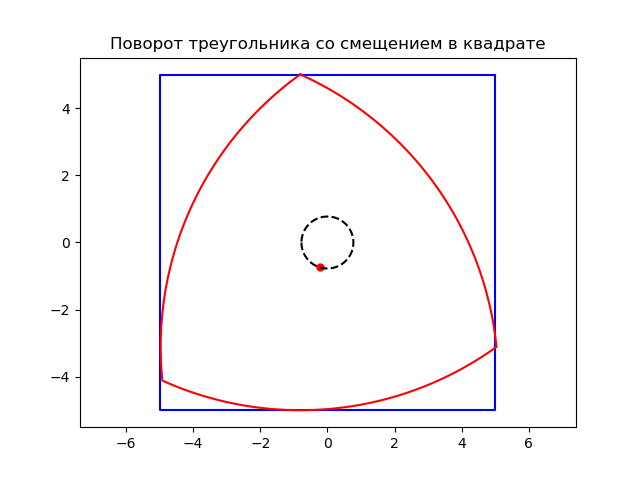

In [25]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
+ center_frame[frame])
plt.figure()
plt.title("Поворот треугольника со смещением в квадрате")
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal');

$\color{Red}{Измененим}$ пользовательскую функцию draw_frame(r, N_frames, frame) , чтобы
создавалось изображение кадра с номером frame для анимации качения
треугольника Рело по квадрату. Переменные из глобальной области видимости в теле
функции использовать нельзя!

In [26]:
def draw_frame(r, N_frames, frame = 0):
    """Функция рисует i-ый кадр анимации поступательного движения треугольника Рёло против часовой стрелки внутри квадрата

    Arguments:

    r: сторона квадрата или ширина треугольника Рёло

    N_frames: кол-во кадров анимации

    frame: номер кадра анимации

    Returns: none
    """
    n = 3
    center = np.array([0.,0.])
    N = 100                                                     # Изначальные значения
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    square = np.array([[r/2,r/2], [-r/2, r/2],[-r/2,-r/2],[r/2,-r/2], [r/2,r/2]])

    h3 = r * 3**(1/2) / 2
    shift = np.array([r / 2 - h3 / 3 - r + h3, 0])

    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame])

    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')         # Вывод результата
    plt.axis('equal');



Изобразим несколько кадров анимации, расположив их в одном графическом окне по горизонтали с использованием функции subplot:

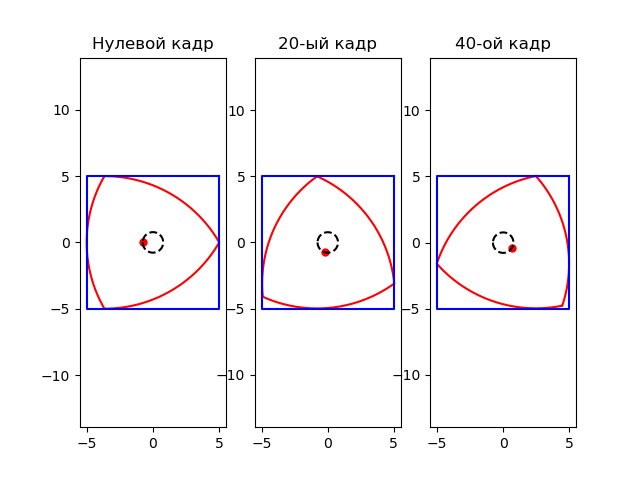

In [27]:
plt.figure()

plt.subplot(1,3,1)
plt.title("Нулевой кадр")
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
plt.title("20-ый кадр")
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
plt.title("40-ой кадр")
draw_frame(r=r, N_frames=N_frames, frame=40)

$\color{Red}{Реализуем~анимацию}$ качения треугольника Рело против часовой стрелки. При
построении анимации возьмите за основу функцию draw_frame , но не используйте ее
напрямую в качестве аргумента функции FuncAnimation (модуль animation
библиотеки matplotlib ).

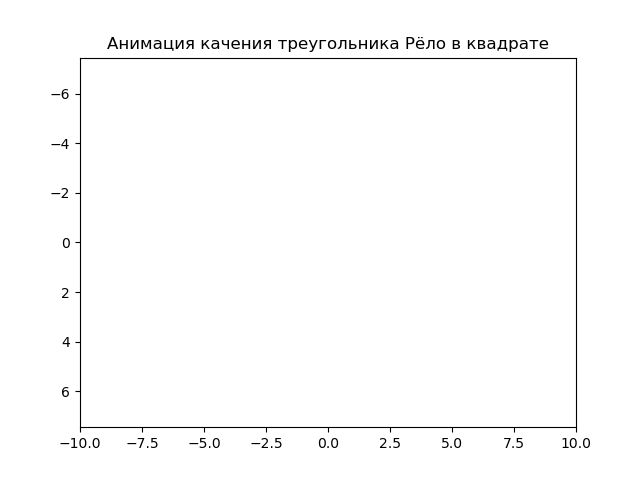

In [32]:
fig2 = plt.figure()
ax2 = plt.axes()

plt.title("Анимация качения треугольника Рёло в квадрате")
plt.axis("equal")
plt.axis([-r, r, r, -r])

rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
theta = np.linspace(0, 2*np.pi/3, N_frames)

def init():
    """создает начальное состояние графической области"""
    global center_point, relo_triag

    center_point, = ax2.plot([center_frame[0,0]], [center_frame[0,1]],'r.', markersize = 10)
    center_circle, = ax2.plot(center_frame[:,0], center_frame[:,1],'k--')
    relo_triag, = ax2.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
    square_plt, = ax2.plot(square[:,0],square[:,1],'b-')
    
def at_frame2(frame):
    center_point.set_data([center_frame[frame,0]], [center_frame[frame,1]])
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame])
    relo_triag.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])

FuncAnimation(fig2, at_frame2, frames=np.arange(N_frames), init_func=init, repeat=False, interval=50)